# Módulo 07, Tarefa 01

Vamos começar a mexer na nossa base de projeto? Já fizemos um exercício de montar a variável resposta, já pudemos perceber que essa atividade pode não ser trivial. Vamos agora trabalhar a base para que fique propícia ao *scikitlearn* para trabalharmos.

Lembrando, a base se chama demo01.csv, e originalmente está publicada [aqui](https://www.kaggle.com/rikdifos/credit-card-approval-prediction).

#### 1) Carregue a base e avalie:

- As variáveis
- Tipos de dados de cada variável
- Quantidade de missings
- Distribuição da variável resposta (mau)

In [1]:
import pandas as pd #Carregando as bibliotecas 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
#recurso interativo do matplotlib

In [2]:
df = pd.read_csv('demo01.csv') # Carregando a base de dados e transformando em DataFrame
print(df.info()) # Informações sobre o DataFrame
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   16650 non-null  object 
 1   posse_de_veiculo       16650 non-null  object 
 2   posse_de_imovel        16650 non-null  object 
 3   qtd_filhos             16650 non-null  int64  
 4   tipo_renda             16650 non-null  object 
 5   educacao               16650 non-null  object 
 6   estado_civil           16650 non-null  object 
 7   tipo_residencia        16650 non-null  object 
 8   idade                  16650 non-null  float64
 9   tempo_emprego          16650 non-null  float64
 10  possui_celular         16650 non-null  int64  
 11  possui_fone_comercial  16650 non-null  int64  
 12  possui_fone            16650 non-null  int64  
 13  possui_email           16650 non-null  int64  
 14  qt_pessoas_residencia  16650 non-null  float64
 15  ma

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,F,N,Y,0,Working,Secondary / secondary special,Civil marriage,House / apartment,54.109589,9.884932,1,0,0,0,2.0,True
16646,F,N,Y,0,Commercial associate,Secondary / secondary special,Married,House / apartment,43.389041,7.380822,1,1,1,0,2.0,True
16647,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,30.005479,9.800000,1,1,0,0,2.0,True
16648,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,30.005479,9.800000,1,1,0,0,2.0,True


#### Observa-se que não existem dados faltantes na base de dados 

In [3]:
# Distribuição da variável resposta (mau)
print(df['mau'].value_counts())
print("\nTaxa de inadimplentes:")
print(df['mau'].mean())


False    16260
True       390
Name: mau, dtype: int64

Taxa de inadimplentes:
0.023423423423423424


([<matplotlib.axis.YTick at 0x1c2ae7b5100>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

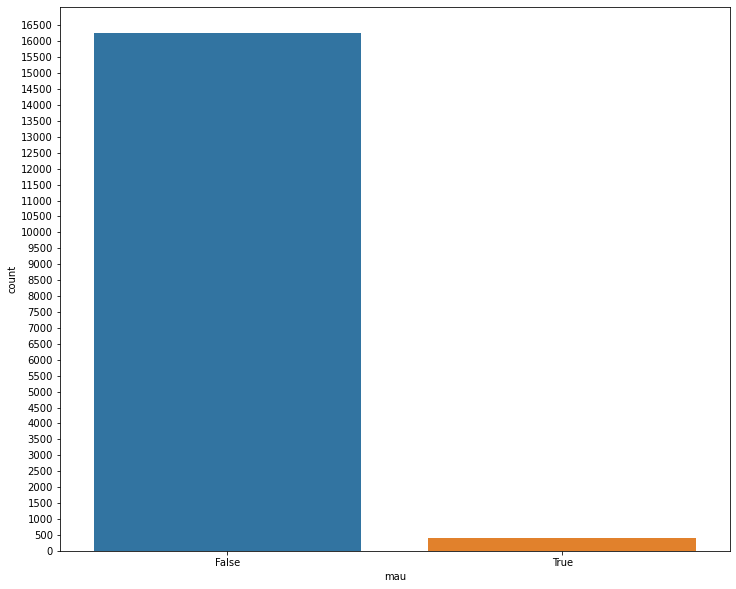

In [4]:
plt.rc('figure', figsize=(12, 10))
sns.countplot(x='mau', data=df) # Visualização descritiva da variável de interesse 'mau'
plt.yticks(range(0,17000,500))

#### 2) Vamos montar um metadados

1. Crie um dataframe com os nomes de cada variável e o tipo de dados de cada variável.
2. Adicione uma coluna nesse *dataframe* chamada "qtd_categorias" e coloque nela o número de categorias correspondente de cada variável. 
    Dica: 
        1. inicie uma lista vazia
        2. faça um for ao longo dos nomes das variáveis, 
        3. conte o número de categorias dessa variável 
        4. acumule essa informação de 3. na lista que você criou em 1. 
        5. No final, essa lista pode ser atribuída à nossa variável.
3. Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}.

In [5]:
metadata = pd.DataFrame(df.dtypes, columns = ['tipo']) # Criando um DataFrame com o tipo de cada variável
metadata


,tipo
sexo,object
posse_de_veiculo,object
posse_de_imovel,object
qtd_filhos,int64
tipo_renda,object
educacao,object
estado_civil,object
tipo_residencia,object
idade,float64
tempo_emprego,float64


In [6]:
metadata['qtd_categorias'] = 0 # Adcicionando uma coluna com a quantidade de categorias de cada variável
for var in metadata.index:
    metadata.loc[var,'qtd_categorias'] = len(df.groupby([var]).size())
metadata

,tipo,qtd_categorias
sexo,object,2
posse_de_veiculo,object,2
posse_de_imovel,object,2
qtd_filhos,int64,8
tipo_renda,object,5
educacao,object,5
estado_civil,object,5
tipo_residencia,object,6
idade,float64,5298
tempo_emprego,float64,3005


#### 3) Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}. Crie um *dataframe* apenas com as variáveis apropriadas para entrada no scikitlearn - elimine as variáveis tipo *str*, mantendo apenas suas versões *dummy*.

In [7]:
#Transformando variáveis categorizadas com mais de duas categorias em dummies
df_encoded = pd.get_dummies(df, columns=['educacao','estado_civil','tipo_residencia','tipo_renda'], drop_first=True)
df_encoded.head(10)

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,...,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents,tipo_renda_Pensioner,tipo_renda_State servant,tipo_renda_Student,tipo_renda_Working
0,M,Y,Y,0,58.832877,3.106849,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,F,N,Y,0,52.356164,8.358904,1,0,1,1,...,0,1,0,0,0,0,0,0,0,0
2,F,N,Y,0,52.356164,8.358904,1,0,1,1,...,0,1,0,0,0,0,0,0,0,0
3,M,Y,Y,0,46.224658,2.106849,1,1,1,1,...,0,1,0,0,0,0,0,0,0,1
4,F,Y,N,0,29.230137,3.021918,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
5,F,Y,N,0,29.230137,3.021918,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
6,F,N,Y,0,27.482192,4.024658,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
7,F,N,Y,0,27.482192,4.024658,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
8,F,N,Y,1,30.049315,4.438356,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
9,F,N,Y,1,30.049315,4.438356,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [8]:
#Transformando variáveis categorizadas com duas categorias em dummies com map (mapping)
df_encoded.sexo = df_encoded.sexo.map({'F': 1, 'M':0})
df_encoded.posse_de_veiculo = df_encoded.posse_de_veiculo.map({'Y': 1, 'N':0})
df_encoded.posse_de_imovel = df_encoded.posse_de_imovel.map({'Y': 1, 'N':0})
#Mostrando novos tipos das variáveis
print(df_encoded.dtypes)
df_encoded.head(10)

sexo                                        int64
posse_de_veiculo                            int64
posse_de_imovel                             int64
qtd_filhos                                  int64
idade                                     float64
tempo_emprego                             float64
possui_celular                              int64
possui_fone_comercial                       int64
possui_fone                                 int64
possui_email                                int64
qt_pessoas_residencia                     float64
mau                                          bool
educacao_Higher education                   uint8
educacao_Incomplete higher                  uint8
educacao_Lower secondary                    uint8
educacao_Secondary / secondary special      uint8
estado_civil_Married                        uint8
estado_civil_Separated                      uint8
estado_civil_Single / not married           uint8
estado_civil_Widow                          uint8


,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,...,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents,tipo_renda_Pensioner,tipo_renda_State servant,tipo_renda_Student,tipo_renda_Working
0,0,1,1,0,58.832877,3.106849,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,1,0,1,0,52.356164,8.358904,1,0,1,1,...,0,1,0,0,0,0,0,0,0,0
2,1,0,1,0,52.356164,8.358904,1,0,1,1,...,0,1,0,0,0,0,0,0,0,0
3,0,1,1,0,46.224658,2.106849,1,1,1,1,...,0,1,0,0,0,0,0,0,0,1
4,1,1,0,0,29.230137,3.021918,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
5,1,1,0,0,29.230137,3.021918,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
6,1,0,1,0,27.482192,4.024658,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
7,1,0,1,0,27.482192,4.024658,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
8,1,0,1,1,30.049315,4.438356,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
9,1,0,1,1,30.049315,4.438356,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1


#### 4) Qual variável é mais poderosa?

Considere as variáveis ```possui_email``` e ```posse_de_veiculo```. Faça uma tabela cruzada entre elas e responda qual delas te parece mais poderosa para prever a probabilidade de ```mau = 1```?

In [11]:
#Tabela cruzada entre as variáveis 'possui_email' e 'posse_de_veiculo'
possui = pd.crosstab(df_encoded['possui_email'], df_encoded['posse_de_veiculo'])
possui


posse_de_veiculo,0,1
possui_email,,
0,9341,5829
1,837,643


A variável ```posse_de_veiculo``` parece mais poderosa para prever a probabilidade de ```mau = 1``` pois além de ser algo gerado pelo fator econômico, a variável de pessoas que possuem ou não veículo tem porcentagens mais próximas do que possuem ou não email, gerando mais relevância para a variável.

#### 5) Salve a base, pois ela será utilizada no final deste módulo.

In [12]:
# Salvando a base de dados propícia para o scikitlearn 
df_encoded.to_csv('base_scikitlearn.csv')